In [1]:
[2,'hi'] *3

[2, 'hi', 2, 'hi', 2, 'hi']

In [2]:
[2,3] * 4

[2, 3, 2, 3, 2, 3, 2, 3]

In [3]:
x = 2 ** 10

In [4]:
x * 2

2048

# aaa

- one
- two
- three
 - four
 
---
1. one
1. two

# Lesson 01: Scikit-learn入門

- scikit-learn本家：http://scikit-learn.org/stable/
- scikit-learn本家チュートリアル：http://scikit-learn.org/stable/tutorial/

In [5]:
from IPython.display import IFrame
IFrame('http://scikit-learn.org/stable', width=800, height=400)

## ステップ１：データハンドリング

In [1]:
# scikit-learnを読み込む
import sklearn

In [2]:
# scikit-learnのバージョンを表示する
sklearn.__version__

'0.17.1'

In [3]:
# scikit-learnからデータセットを読み込む
from sklearn import datasets

In [4]:
# datasets.make_moons()を使い、1000個の入出力サンプル（X, y）を生成。
# noiseには0.2、乱数シードは0を使用。
X, y = datasets.make_moons(noise=0.2, random_state=0, n_samples=1000)

In [5]:
# X自体を見る
X

array([[ 2.08614399,  0.57401401],
       [ 1.80460944,  0.00695963],
       [-0.22711217,  0.57390962],
       ..., 
       [ 0.36440909, -0.63622697],
       [ 0.18568733,  0.06229272],
       [ 0.48561562, -0.53284399]])

In [6]:
# Xの形をみる
X.shape

(1000, 2)

In [7]:
# Xのデータ型をみる
type(X)

numpy.ndarray

In [8]:
X.max(axis=1).shape

(1000,)

## ステップ２：初期分析と仮説構築

In [25]:
# 可視化用ライブラリの読み込み
import matplotlib.pyplot as plt

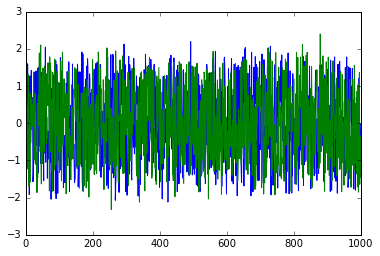

In [26]:
# plt.plotを使い描画
%matplotlib inline
plt.plot(X)

In [27]:
# あれ図がでないぞ
%matplotlib inline

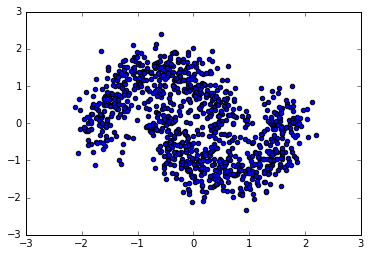

In [28]:
#  plt.scatterを使い描画
#　これは使えそう　Xの１列目とXの２列目
plt.scatter(X[:,0],X[:,1])

In [29]:
import matplotlib as mpl
#色付け　あとで調べよう
mpl.rc('font', **{'size': 14})

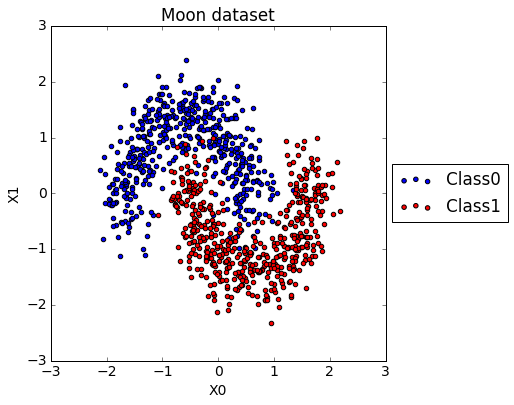

In [30]:
# 色分けして描画　パネルのサイズ変更
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(X[y==0,0],X[y==0,1],c='b',label='Class0')
ax.scatter(X[y==1,0],X[y==1,1],c='r',label='Class1')
ax.legend(loc='center left',
          bbox_to_anchor= (1.02, 0.5,), 
          borderaxespad=0)
ax.set(xlabel='X0',ylabel='X1',title='Moon dataset')
ax.set_aspect('equal','datalim')

In [31]:
# データの散らばり具合（標準偏差）を見てみる
X.std(axis=0)

array([ 1.,  1.])

In [32]:
# skleranから前処理用モジュールを読み込む
from sklearn import preprocessing

In [33]:
# データの正規化（縦横の縮尺を合わせる工程（この時縦横の平均は０にしてある））
X = preprocessing.scale(X)

In [34]:
# データの散らばり具合（標準偏差）を再確認
X.std(axis=0)

array([ 1.,  1.])

In [35]:
# ラベル付きデータをトレーニングセットとテストセットに分割するためのモジュールを読み込む
from sklearn import cross_validation

In [36]:
# ラベル付きデータをトレーニtングセット (X_train, y_train)とテストセット (X_test, y_test)に分割 シードは同じになるように
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
# X_trainの形
X_train.shape

(800, 2)

In [38]:
# y_trainの形 一次元で渡す
y_train.shape

(800,)

In [39]:
# X_testの形
X_test.shape

(200, 2)

In [40]:
# y_testの形
y_test.shape

(200,)

## ステップ３：機械学習

- 問題設定にあったモデルを選ぶ

- http://scikit-learn.org/stable/index.html
- http://scikit-learn.org/stable/modules/classes.html

In [41]:
# まずは簡単なモデルで試してみよう

# === 線形モデル ===
# モジュールの読み込み
#from sklearn import linear_model
#  モデル構築
#model = linear_model.LogisticRegression()

# === サポートベクターマシン ===
# モジュールの読み込み
#FILL_IN
#  モデル構築
#FILL_IN

# === ランダムフォレスト ===
#　二分木
# モジュールの読み込み
from sklearn import ensemble
#  モデル構築
model = ensemble.RandomForestClassifier(n_estimators=5,max_depth=3)

# === 勾配ブースティング ===
# モジュールの読み込み
#FILL_IN
#  モデル構築
#FILL_IN

In [42]:
# 学習　予測のものさしを自動で
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [190]:
# トレーニングセットに対する予測
y_train_pred = model.predict(X_train)

In [191]:
y_train_pred.shape

(800,)

In [192]:
# テストセットに対する予測
y_test_pred = model.predict(X_test)

## ステップ４：結果の評価

#### 結果の評価（方法１）：y_test_predを使って予測精度を出す

In [193]:
# 評価基準モジュール（metrics）の読み込み
from sklearn import metrics

In [194]:
# トレーニングデータに対する予測精度を計算
print(metrics.accuracy_score(y_train,y_train_pred))

0.93375


In [195]:
# テストデータに対する予測精度を計算
print(metrics.accuracy_score(y_test,y_test_pred))

0.875


#### 結果の評価：（方法２）: model.score(X, y)を使って予測精度を出す

In [196]:
# トレーニングデータに対する予測精度を計算
train_score = model.score(X_train,y_train)

In [197]:
# テストデータに対する予測精度を計算
test_socre = model.score(X_test,y_test)

#### 結果を見やすいように整形

In [198]:
print u"トレーニングデータの予測精度： {0:.2f}%".format(train_score)
print u"テストデータの予測精度： {0:.2f}%".format(test_socre)

トレーニングデータの予測精度： 0.93%
テストデータの予測精度： 0.88%


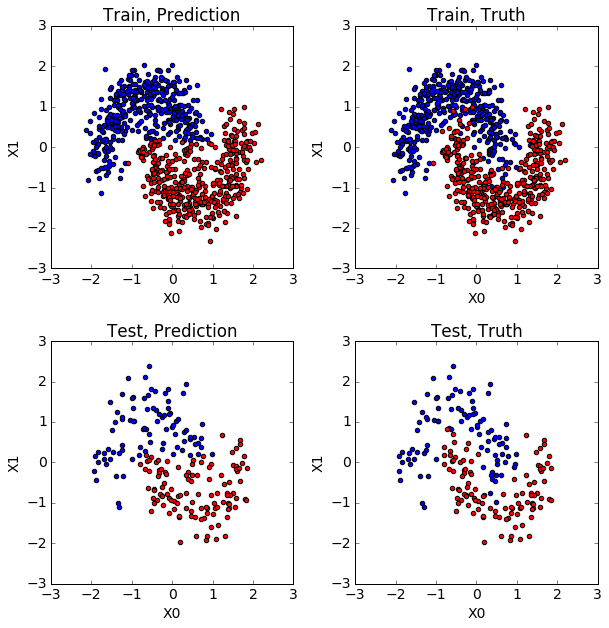

In [199]:
# 結果の可視化

fig, ax = plt.subplots(2, 2, figsize=(10, 10));

for ii in xrange(2):
    for jj in xrange(2):
        if ii == 0:
            XX = X_train
            yy = y_train_pred if jj == 0 else y_train
            title = "Train, Prediction" if jj == 0 else "Train, Truth"
        elif ii == 1:
            XX = X_test
            yy = y_test_pred if (jj == 0) else y_test
            title = "Test, Prediction" if jj == 0 else "Test, Truth"
            
        ax[ii, jj].scatter(XX[yy==0, 0], XX[yy==0, 1], c='b', label='Class 0')
        ax[ii, jj].scatter(XX[yy==1, 0], XX[yy==1, 1], c='r', label='Class 1')
        ax[ii, jj].set(xlabel='X0', ylabel='X1', title=title);
        ax[ii, jj].set_aspect('equal')
        
fig.subplots_adjust(wspace=0.2, hspace=0.3)

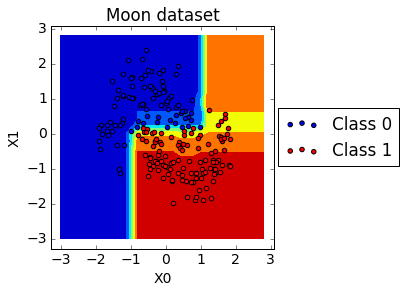

In [200]:
# 入力空間全体にモデルの予測値を描画

import numpy as np

x_min = -3; x_max = 3
y_min = -3; y_max = 3
h = 0.2

# 空間をメッシュ状に区切り、各点での予測を得る
xs, ys = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
zs = model.predict_proba(np.c_[xs.ravel(), ys.ravel()])[:, 1]
zs = zs.reshape(xs.shape)

fig, ax = plt.subplots()
# 入力空間全体におけるモデルの予測値
ax.contourf(xs, ys, zs) 
# テストセットの各入力点における予測値
ax.scatter(X_test[y_test_pred==0, 0], X_test[y_test_pred==0, 1], label='Class 0')
ax.scatter(X_test[y_test_pred==1, 0], X_test[y_test_pred==1, 1], c='r', label='Class 1')
ax.legend(bbox_to_anchor=(1.02, 0.5,), loc='center left', borderaxespad=0)
ax.set_aspect('equal')

ax.set(xlabel='X0', ylabel='X1', title="Moon dataset");

### モデル選択

- [分類器の比較](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [201]:
# 分類モデルの読み込み

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# K最近傍法
from sklearn.neighbors import KNeighborsClassifier
# サーポートベクターマシン
from sklearn.svm import SVC
# 決定木
from sklearn.tree import DecisionTreeClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
# 勾配ブースティング
from sklearn.ensemble import GradientBoostingClassifier

In [202]:
# 交差検証用モジュールの読み込み
from sklearn.cross_validation import cross_val_score

In [ ]:
# KFoldを使って交差検証の舞台裏を理解


In [ ]:
# StratifiedKFoldを使って交差検証の舞台裏を理解
FILL_IN

In [204]:
# cross_val_scoreを使った交差検証

# モデルの構築
model = LogisticRegression()

# cross_val_scoreを使った交差検証。cvに自分で作ったcvオブジェクト（kfold）を渡しても良い。
result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# 結果の表示
print("{0}\n{1:.3f} ({2:.3f})\n{3}".format(result, result.mean(), result.std(), model.__str__()))

[ 0.8447205   0.875       0.91875     0.86875     0.90566038]
0.883 (0.027)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [205]:
#　複数の分類器を用意
classifiers = [
    ('lr', LogisticRegression()), 
    ('knn', KNeighborsClassifier()),
    ('linear svc', SVC(kernel="linear")),
    ('rbf svc', SVC(gamma=2)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbc', GradientBoostingClassifier()),
    #('ab', AdaBoostClassifier()),    
    #('gnb', GaussianNB()),
    #('lda', LinearDiscriminantAnalysis()),
    #('qda', QuadraticDiscriminantAnalysis())
]

In [206]:
# それぞれのモデルに対して、交差検証（CV）をかける
import time
results = {}
exec_times = {}

for name, model in classifiers:
    tic = time.time()
    result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    exec_time = time.time() - tic
    exec_times[name] = exec_time
    results[name] = result
    
    print("{0:.3f} ({1:.3f}): time {2:.2f}s, {3}".format(result.mean(), result.std(), exec_time, name))

0.883 (0.027): time 0.02s, lr
0.965 (0.020): time 0.01s, knn
0.879 (0.024): time 0.05s, linear svc
0.965 (0.020): time 0.06s, rbf svc
0.950 (0.024): time 0.02s, dt
0.958 (0.023): time 0.30s, rf
0.960 (0.021): time 0.30s, gbc


In [207]:
# 結果の描画を楽にするためpandasを使う
# まずはライブラリの読み込み
import pandas as pd

In [209]:
# 結果をデータフレームに入れる
df = pd.DataFrame(results)

In [211]:
df

,dt,gbc,knn,linear svc,lr,rbf svc,rf
0,0.925466,0.950311,0.944099,0.850932,0.84472,0.956522,0.950311
1,0.975000,0.968750,0.975000,0.862500,0.87500,0.968750,0.956250
2,0.975000,0.968750,0.981250,0.918750,0.91875,0.981250,0.981250
3,0.918750,0.925000,0.937500,0.868750,0.86875,0.931250,0.918750
4,0.955975,0.987421,0.987421,0.893082,0.90566,0.987421,0.981132


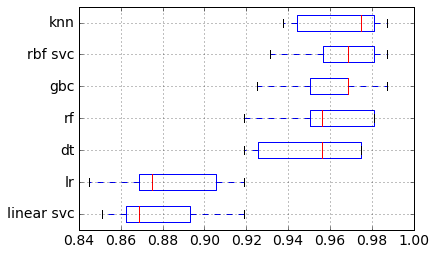

In [219]:
# ボックスプロットによる結果の描画
import warnings
warnings.simplefilter("ignore")

df[df.median().sort_values(ascending=True).index].boxplot(vert=False);

In [216]:
# 結果とモデルパラメータの詳細表示
for name, model in classifiers:
    result = results[name]
    print("{0:.3f} ({1:.3f})\n{2}\n{3}\n----------".format(result.mean(), result.std(), result, model.__str__()))

0.883 (0.027)
[ 0.8447205   0.875       0.91875     0.86875     0.90566038]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----------
0.965 (0.020)
[ 0.94409938  0.975       0.98125     0.9375      0.98742138]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
----------
0.879 (0.024)
[ 0.85093168  0.8625      0.91875     0.86875     0.89308176]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
0.965 (0.020)
[ 0.95652174  0.96875     0.98125     0.93125     0.98742138]
SVC(C=1

In [217]:
# 計算時間でソート
sorted(exec_times.items(), key=lambda x: x[1])

[('knn', 0.012380123138427734),
 ('dt', 0.015208959579467773),
 ('lr', 0.018516063690185547),
 ('linear svc', 0.054116010665893555),
 ('rbf svc', 0.055757999420166016),
 ('gbc', 0.2977170944213867),
 ('rf', 0.3016490936279297)]

### ハイパーパラメーターサーチ

#### １次元の場合

In [220]:
# validation_curveモジュールを読み込む
from sklearn.learning_curve import validation_curve
impor numpy as np

In [225]:
# ハイパーパラメータの取り得る範囲をparam_rangeで決める
param_range = np.arange(1,20)

# validation_curve()を使いtrain_scoresとvalid_scoresを得る。
# パラメータ名はparam_nameで指定
train_scores, valid_scores = validation_curve(KNeighborsClassifier(),
                             X_train,y_train,param_name='n_neighbors',
                             param_range=param_range)

In [226]:
def plot_validation_curve(train_scores, valid_scores, plot=plt.plot):

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel("Hyperparameter")
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    plot(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plot(param_range, valid_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.show()

    print "Best parameter is {}".format(param_range[valid_scores_mean.argmax()])

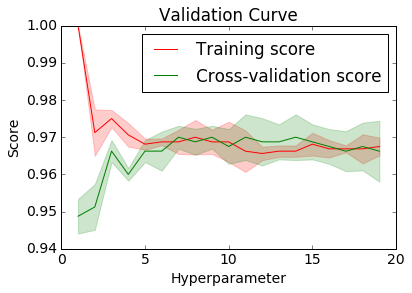

Best parameter is 7


In [227]:
# validation curveを描画する
plot_validation_curve(train_scores, valid_scores)

In [229]:
(20 ** 5) * 5

16000000

In [231]:
# モデルの構築（ラインサーチで見つけたベストなパラメータを使う）
best_model = KNeighborsClassifier(n_neighbors=7)

# モデルの学習
best_model.fit(X_train,y_train)

# トレーニングデータに対する予測精度
print "mean accuracy (train): {0:.3f}".format(best_model.score(X_train,y_train))

# テストデータに対する予測精度
# この値が実際に学習済みのシステムをデプロイした際に得られるであろう予測精度
# この値を計算するときにだけテストデータを使う(超重要)
print "mean accuracy (test): {0:.3f}".format(best_model.score(X_test, y_test))

mean accuracy (train): 0.973
mean accuracy (test): 0.955


#### ２次元の場合

参考資料：[RBF SVM parameters (scikit-learn)](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

In [232]:
# GridSearchCVモジュールの読み込み
from sklearn.grid_search import GridSearchCV

In [233]:
# モデルの構築
model = SVC(kernel='rbf')

# 各ハイパーパラメータごとに調べるポイントを決める
C_range = np.logspace(-2, 3, 6)
gamma_range = np.logspace(-3, 2, 6)

# 探索範囲をparam_gridにまとめる
param_grid = dict(gamma=gamma_range, C=C_range)

# GridSearchCVを使い、グリッドサーチオブジェクトを構築
gs = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)

# グリッドサーチを実行
gs.fit(X_train, y_train)

# 最良のハイパーパラメータを表示
print("The best parameters are %s with a score of %0.2f"
      % (gs.best_params_, gs.best_score_))

The best parameters are {'C': 0.10000000000000001, 'gamma': 10.0} with a score of 0.97


In [234]:
# 各ハイパーパラメータの組み合わせに対する評価値をすべて列挙
gs.grid_scores_

[mean: 0.50750, std: 0.00153, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.50750, std: 0.00153, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.88000, std: 0.02387, params: {'C': 0.01, 'gamma': 0.10000000000000001},
 mean: 0.91250, std: 0.02285, params: {'C': 0.01, 'gamma': 1.0},
 mean: 0.50750, std: 0.00153, params: {'C': 0.01, 'gamma': 10.0},
 mean: 0.50750, std: 0.00153, params: {'C': 0.01, 'gamma': 100.0},
 mean: 0.50750, std: 0.00153, params: {'C': 0.10000000000000001, 'gamma': 0.001},
 mean: 0.87875, std: 0.02610, params: {'C': 0.10000000000000001, 'gamma': 0.01},
 mean: 0.88000, std: 0.02001, params: {'C': 0.10000000000000001, 'gamma': 0.10000000000000001},
 mean: 0.96000, std: 0.01282, params: {'C': 0.10000000000000001, 'gamma': 1.0},
 mean: 0.96625, std: 0.01958, params: {'C': 0.10000000000000001, 'gamma': 10.0},
 mean: 0.51750, std: 0.00424, params: {'C': 0.10000000000000001, 'gamma': 100.0},
 mean: 0.87875, std: 0.02610, params: {'C': 1.0, 'gamma': 0.001},
 mean: 0.88000, std:

In [235]:
# 見やすくするためにデータフレームに入れる
cv_scores = []
for gsgs in gs.grid_scores_:
    tmp = gsgs.parameters.values() + gsgs.cv_validation_scores.tolist()
    cv_scores.append(tmp)
    
param_names = gsgs.parameters.keys()
columns = param_names + np.arange(len(gsgs.cv_validation_scores)).tolist()

df_gs = pd.DataFrame(cv_scores, columns=columns)
df_gs.set_index(param_names, inplace=True)

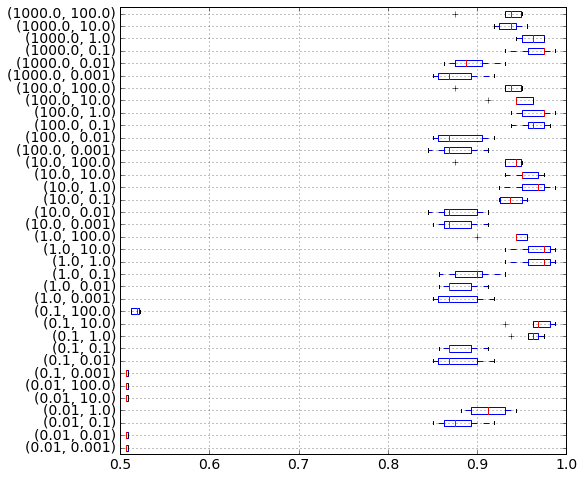

In [236]:
# boxplotで見てみる
fig, ax = plt.subplots(figsize=(8, 8))
df_gs.T.boxplot(vert=False);

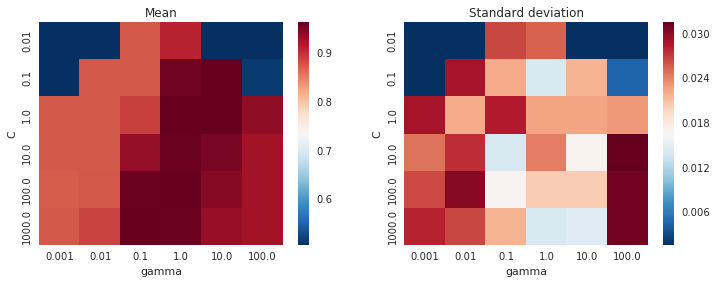

In [237]:
# ヒートマップで可視化
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_gs.mean(axis=1).unstack(), ax=ax[0], cmap='RdBu_r')
ax[0].set_title('Mean')
sns.heatmap(df_gs.std(axis=1).unstack(), ax=ax[1], cmap="RdBu_r")
ax[1].set_title('Standard deviation')

In [ ]:
# モデルの構築（グリッドサーチで見つけたベストなパラメータを使用）
best_model = FILL_IN

# モデルの学習
FILL_IN

# トレーニングデータに対する予測精度
print "mean accuracy (train): {0:.3f}".format(FILL_IN)

# テストデータに対する予測精度
print "mean accuracy (test): {0:.3f}".format(FILL_IN)

#### 3次元以上の場合

- 方法１：GridSearchCVを使う
    - パラメータ空間の次元がそれほど高くないときは使えるが、すぐに次元の呪いでキツくなる...
- 方法２: RandomizedSearchCVを使う
    - 高次元になった場合はランダムサーチの方が効率的

In [ ]:
# ランダムサーチ用にRandomizedSearchCVモジュールを読み込む
FILL_IN

In [ ]:
# 分布を指定するためにscipy.statsを読み込む
FILL_IN

In [ ]:
# パラメータ空間上に分布を指定する（今回はランダムフォレストを仮定）
param_dist = {FILL_IN}

In [ ]:
# ランダムサーチCVオブジェクトを作る
random_search = FILL_IN

In [ ]:
# ランダムサーチを実行
tic = time.time() # 時間計測開始
random_search.FILL_IN
toc = time.time() # 時間計測終了

In [ ]:
# 結果を表示
from pprint import pprint
print("Best score: {0}\nExecution time: {1:.2f} sec".format(random_search.best_score_, toc - tic))
print("Best param:")
pprint(random_search.best_params_)

In [ ]:
# ベストなパラメータを別名で保存
rf_best_params = random_search_rf.best_params_

In [ ]:
# モデルの構築（ランダムサーチで見つけたベストなパラメータを使用）
best_model = FILL_IN

In [ ]:
# モデルの学習
FILL_IN

In [ ]:
# トレーニングデータに対する予測精度
print "mean accuracy (train): {0:.3f}".format(FILL_IN)

In [ ]:
# テストデータに対する予測精度
print "mean accuracy (test): {0:.3f}".format(FILL_IN)

## モデルアンサンブルによる予測

In [ ]:
# VotingClassifierの読み込み
FILL_IN

In [ ]:
# 複数のモデルを用意。各モデルのハイパーパラメータはチューニング済みと仮定
classifiers = [
    ('knn', FILL_IN),
    ('rbf svc', FILL_IN),
    ('rf', FILL_IN)
]

In [ ]:
# VotingClassifierの作成
FILL_IN

In [ ]:
# トレーニング
FILL_IN

In [ ]:
# トレーニングデータに対する予測精度
print("mean accuracy (train): {0:.4f}".format(FILL_IN))

# テストデータに対する予測精度
print("mean accuracy (test): {0:.4f}".format(FILL_IN))